#**PROBLEMA DE NEGOCIO**


---


Una agencia inmobiliaria en California necesita mejorar su estrategia de precios para optimizar la compra y venta de propiedades. Actualmente, no se están considerando adecuadamente las variables espaciales, como la distancia a la costa y la proximidad a ciudades importantes, lo que afecta la rentabilidad. El objetivo del proyecto es desarrollar un modelo predictivo que, usando datos de geolocalización (latitud, longitud, distancia a la costa) y características del inmueble, permita estimar con precisión el precio de las viviendas y mejorar la toma de decisiones en su estrategia de precios.

### **Tus tareas principales serán:**

**1. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables clave y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes. Identificar tambien si la posicion geografica es determinante en el precio.

**2. Preprocesamiento de Datos:** Realizar limpieza de datos, limpiar valores atipicos y normalización/escalado de datos.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning xgboost para predecir el valor medio de las viviendas.

**4. Evaluación y Selección del Modelo:**  Determinar el ajuste optimo del modelo por medio de `GridSearchCV` para tener predicciones que puedan ser empleadas como una herramienta de valorizacion de esos predios.

#**1. Configuración del Ambiente**


---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**2. Exploración de Datos**


---

In [ ]:
# Cargar dataset desde un archivo CSV (ajusta la ruta a tu archivo)
data = pd.read_csv('California_Houses.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [ ]:
data.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


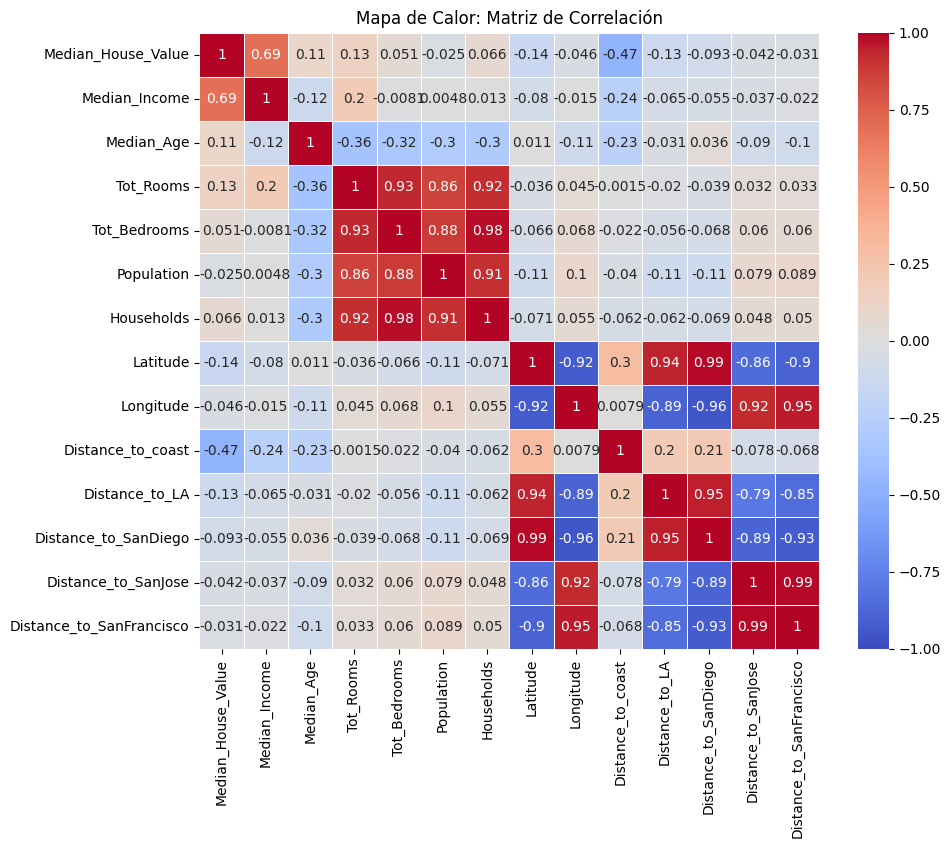

In [ ]:
corr_matrix = data.corr()

# Crear el mapa de calor
#Tu código aquí

<ipython-input-7-125a149c1a2c>:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Median House Value')


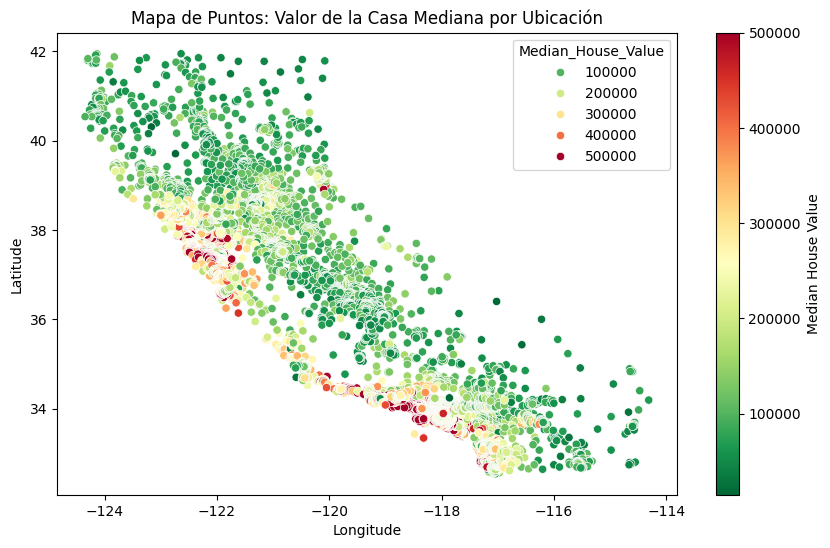

In [ ]:
palette = sns.color_palette("RdYlGn_r", as_cmap=True)  # Invertimos para tener verde en valores bajos y rojo en altos

# Crear el gráfico de dispersión
#Tu código aquí

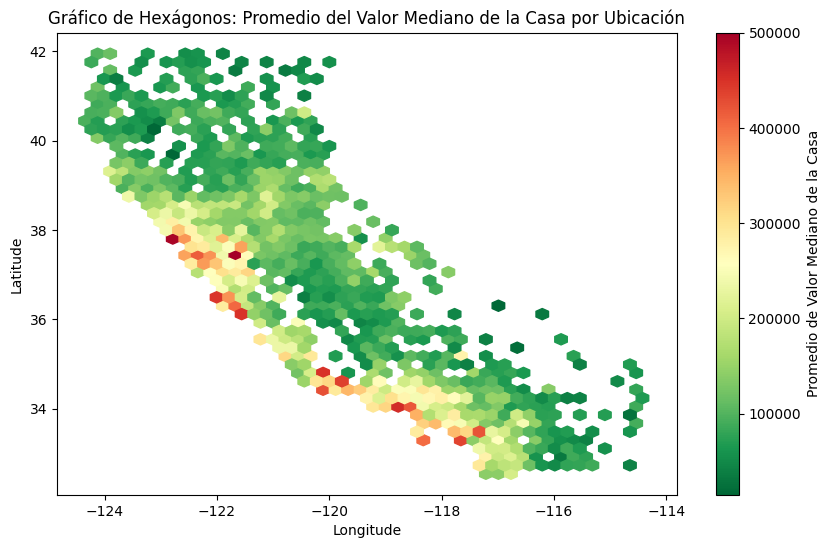

In [ ]:
# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Crear el gráfico hexbin agregando el promedio de 'Median_House_Value'
#Tu código aquí

#**3. Preprocesamiento de Datos**


---

 ## 3.1 Evaluando Outliers

In [ ]:
limites = {columna: 0.98 for columna in data.columns}

In [ ]:
limites

{'Median_House_Value': 0.98,
 'Median_Income': 0.98,
 'Median_Age': 0.98,
 'Tot_Rooms': 0.98,
 'Tot_Bedrooms': 0.98,
 'Population': 0.98,
 'Households': 0.98,
 'Latitude': 0.98,
 'Longitude': 0.98,
 'Distance_to_coast': 0.98,
 'Distance_to_LA': 0.98,
 'Distance_to_SanDiego': 0.98,
 'Distance_to_SanJose': 0.98,
 'Distance_to_SanFrancisco': 0.98}

In [ ]:
def clear_hist(df,x):
  #Tu código aquí

--------------------------------------Median_House_Value---------------------------------------------


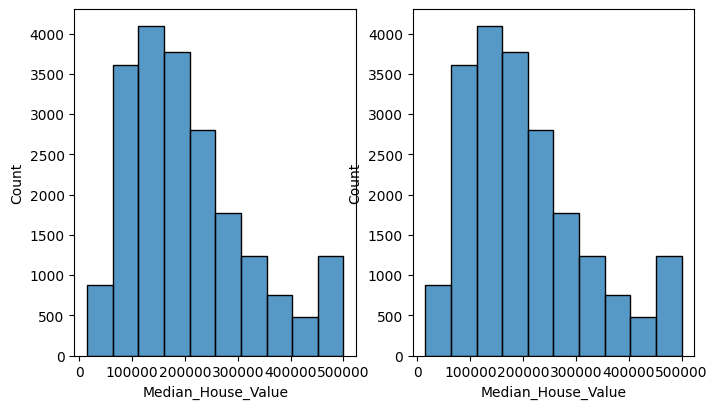

--------------------------------------Median_Income---------------------------------------------


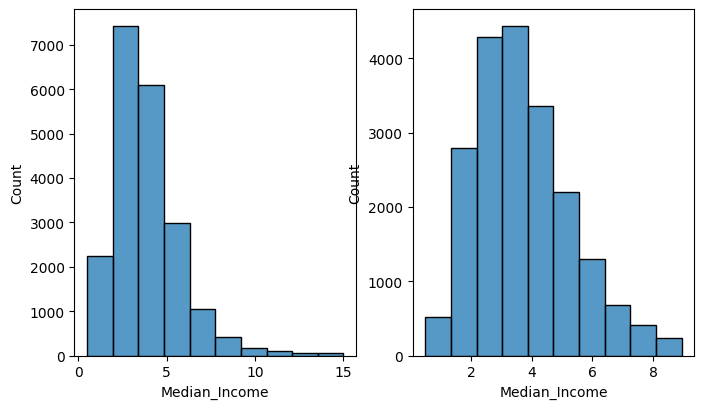

--------------------------------------Median_Age---------------------------------------------


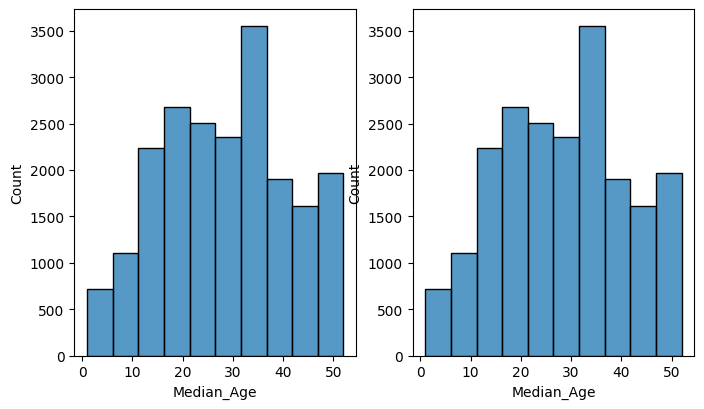

--------------------------------------Tot_Rooms---------------------------------------------


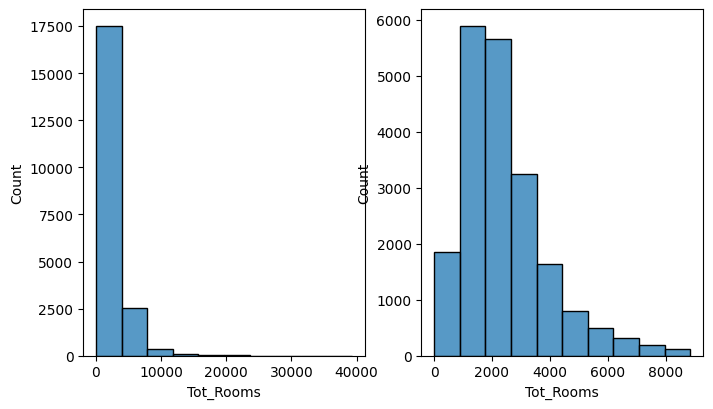

--------------------------------------Tot_Bedrooms---------------------------------------------


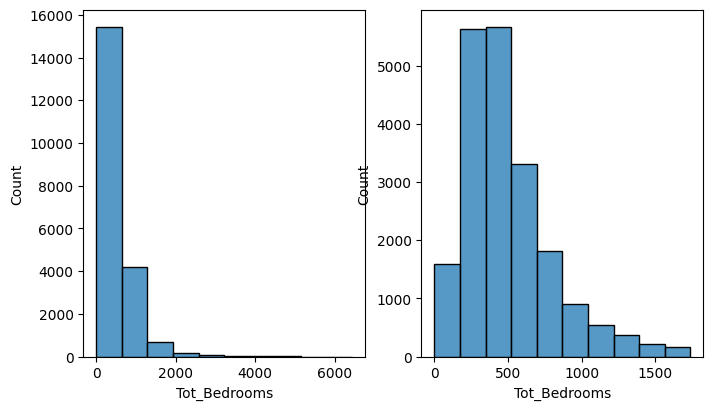

--------------------------------------Population---------------------------------------------


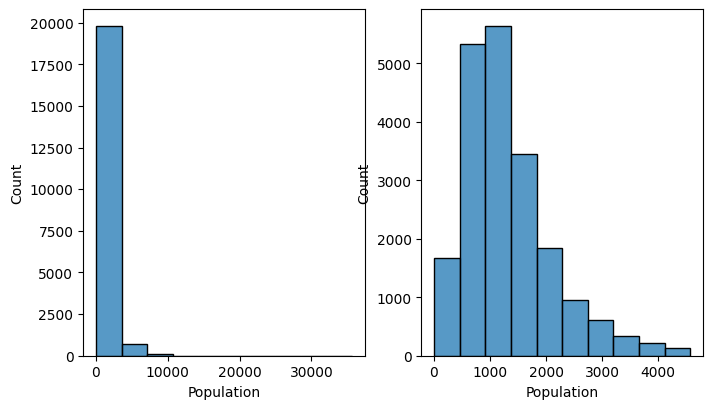

--------------------------------------Households---------------------------------------------


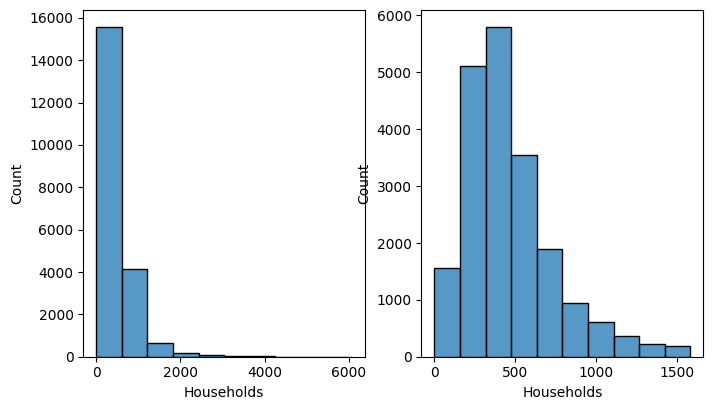

--------------------------------------Latitude---------------------------------------------


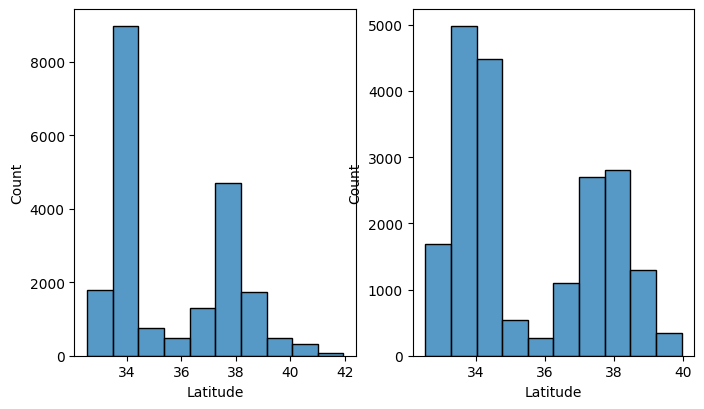

--------------------------------------Longitude---------------------------------------------


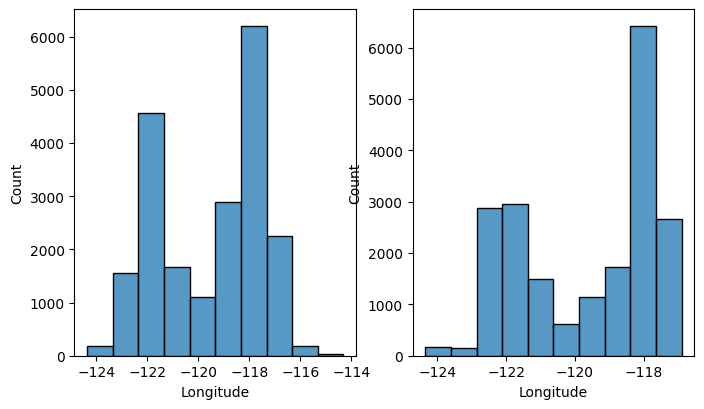

--------------------------------------Distance_to_coast---------------------------------------------


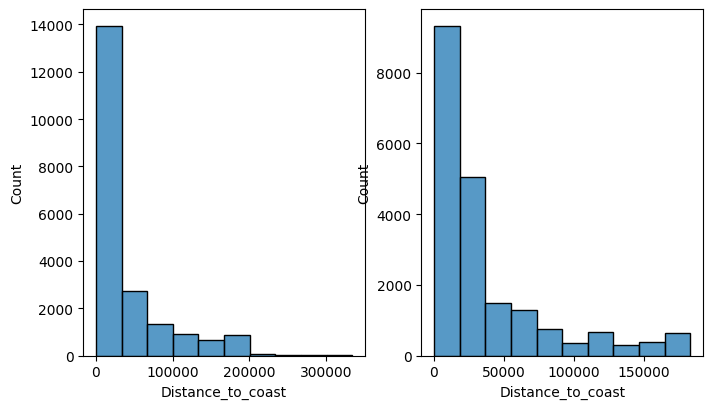

--------------------------------------Distance_to_LA---------------------------------------------


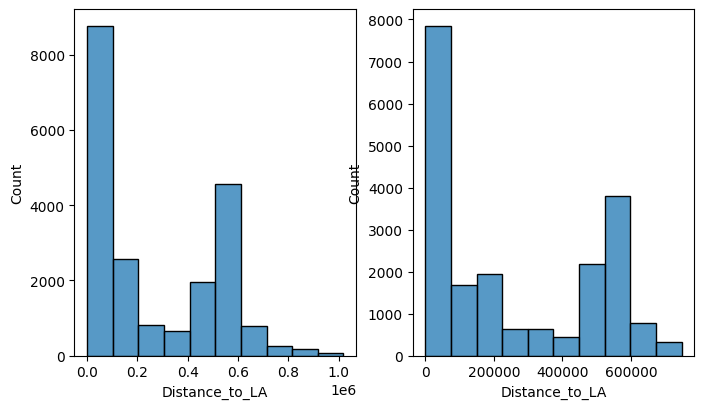

--------------------------------------Distance_to_SanDiego---------------------------------------------


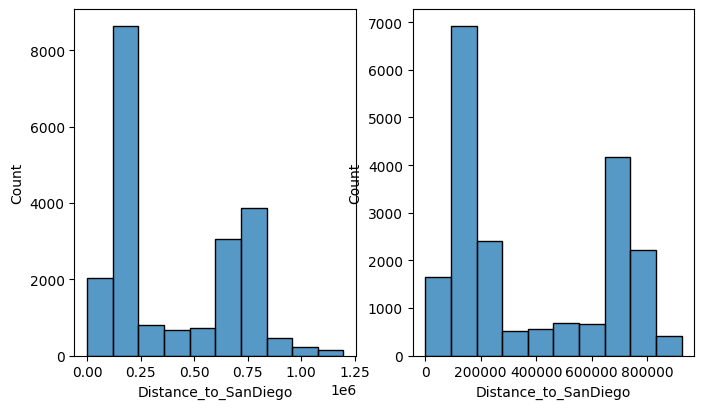

--------------------------------------Distance_to_SanJose---------------------------------------------


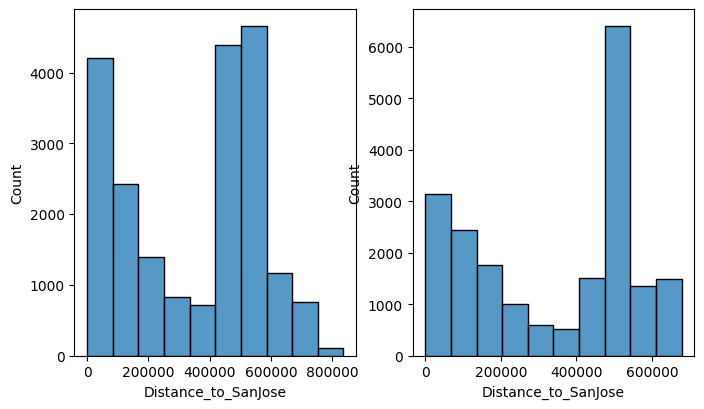

--------------------------------------Distance_to_SanFrancisco---------------------------------------------


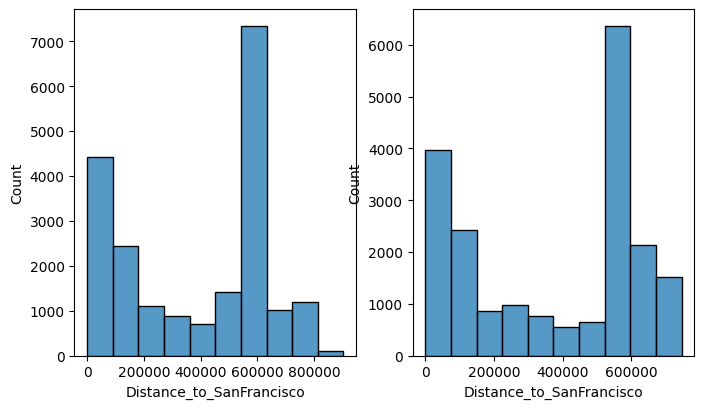

In [ ]:
for x in data.columns:
  clear_hist(data,x)

## 3.2 Truncando la variable

In [ ]:
for var, limit in limites.items():
  #Tu código aquí

In [ ]:
vars = data.columns
vars

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')

In [ ]:
vars.drop('Latitude')
vars.drop('Longitude')

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')

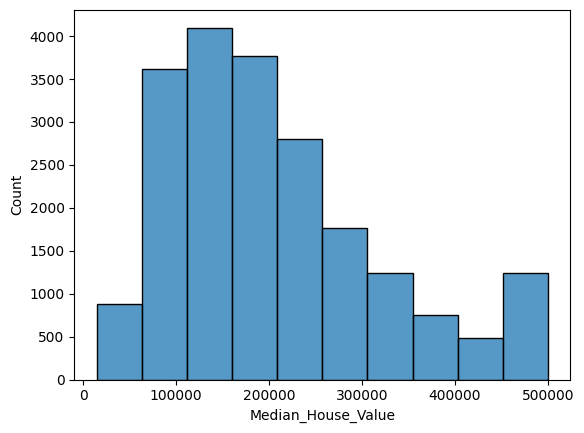

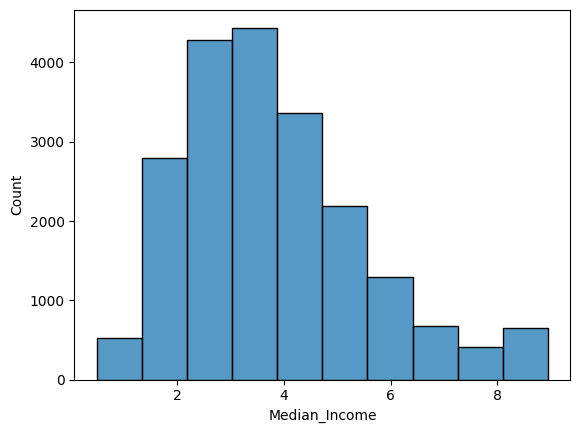

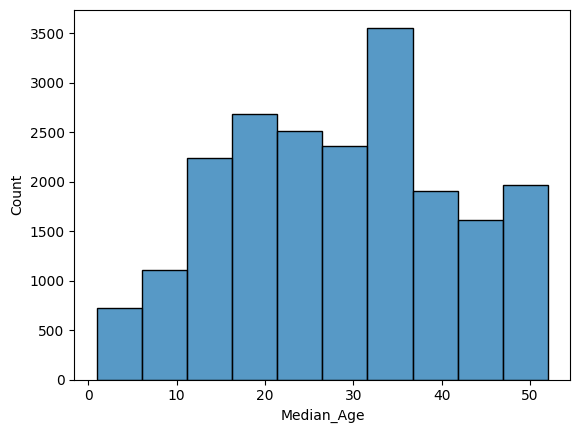

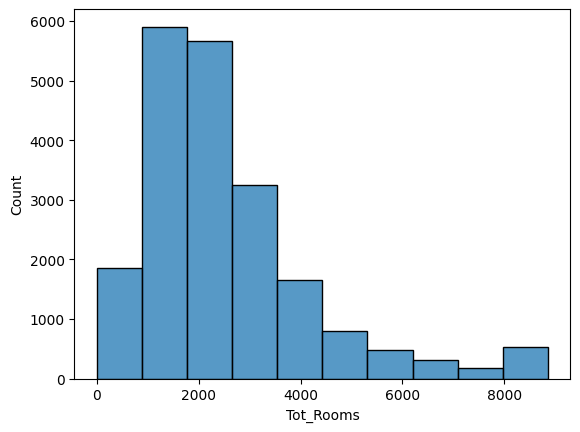

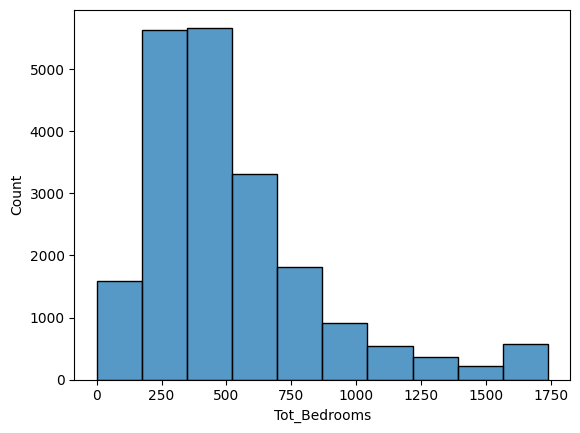

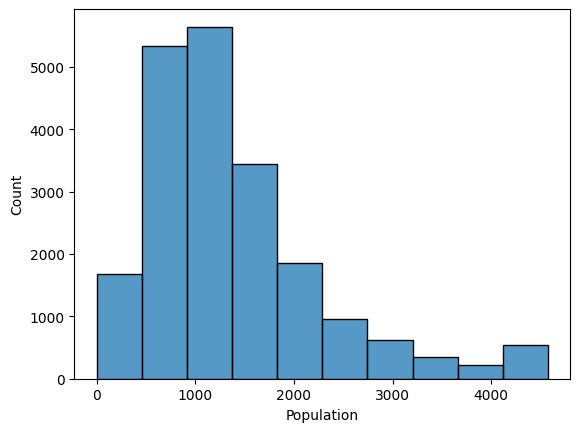

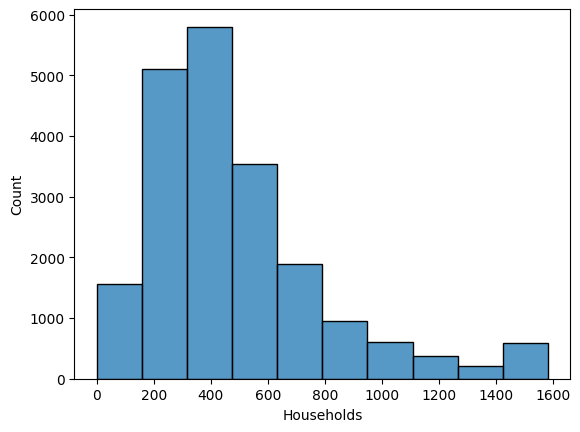

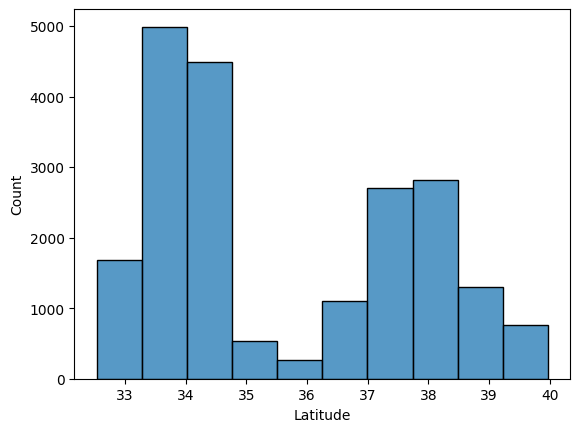

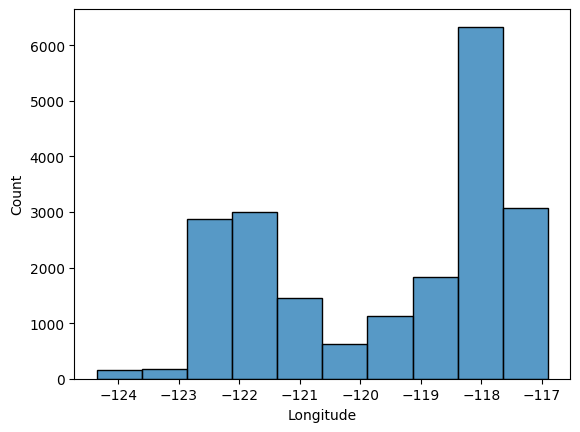

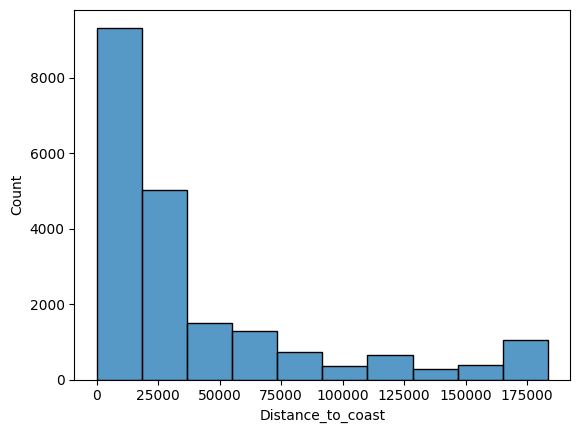

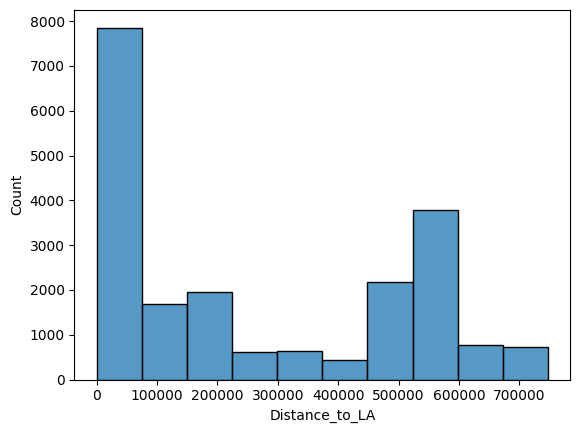

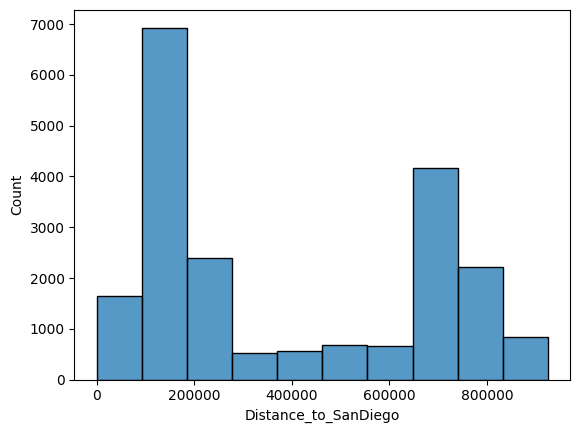

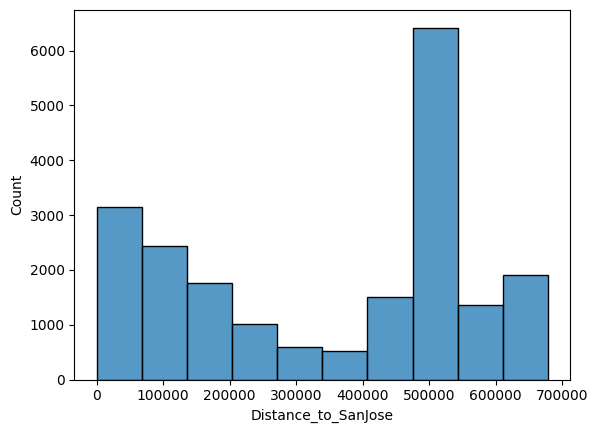

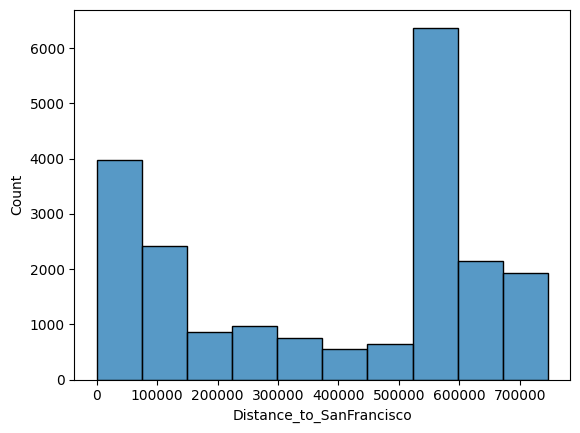

In [ ]:
#visualizando nuevos histogramas
for x in vars:
  #Tu código aquí

#**4. Construcción de Modelos**


---

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X = data.drop('Median_House_Value', axis=1)
y = data['Median_House_Value']

In [ ]:
X_train, X_test, y_train, y_test = #Tu código aquí

## 4.1 xgboost

In [ ]:
model = #Tu código aquí
# Entrenar el modelo
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 46717.60654135768


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [],#Tu código aquí
    'learning_rate': [],#Tu código aquí
    'max_depth': []#Tu código aquí
}

In [ ]:
xgb_model = #Tu código aquí

In [ ]:
grid_search = #Tu código aquí

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# @title
# Hacer predicciones con el mejor modelo
xgb_model = grid_search.best_estimator_
y_pred_optimized = xgb_model.predict(X_test)

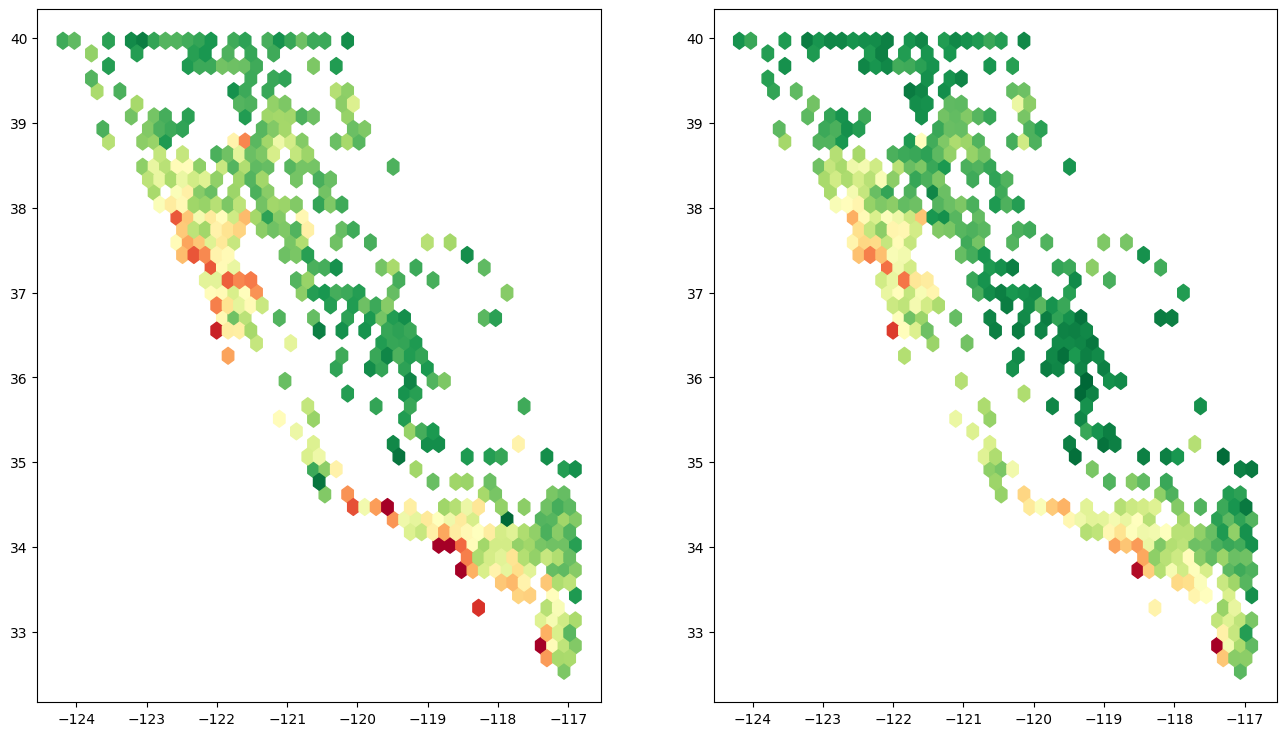

In [ ]:
# @title
fig,ax = plt.subplots(1,2,figsize=(16,9))
#Tu código aquí

## 4.2 lightgbm

In [ ]:
import lightgbm as lgb

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Crear el modelo de LightGBM
model = #Tu código aquí

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3111
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 13
[LightGBM] [Info] Start training from score 207194.693738


LGBMRegressor(objective='regression')

In [ ]:
# Hacer predicciones
y_pred = model.predict(X_test)

In [ ]:
# Parámetros para GridSearchCV
param_grid = {
    'n_estimators': [],#Tu código aquí
    'learning_rate': [],#Tu código aquí
    'max_depth': []#Tu código aquí
}

In [ ]:
# Crear un nuevo modelo para la búsqueda de hiperparámetros
lgb_model = lgb.LGBMRegressor(objective='regression')

In [ ]:
# GridSearchCV para optimizar el modelo
grid_search = #Tu código aquí
# Entrenar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

In [ ]:
# Hacer predicciones con el mejor modelo
lgb_model = grid_search.best_estimator_
y_pred_optimized = lgb_model.predict(X_test)

#**5. Evaluación y Selección del Modelo**


---

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [ ]:
# Métricas para XGBoost
y_pred_xgb = #Tu código aquí
rmse_xgb = #Tu código aquí
mae_xgb = #Tu código aquí
r2_xgb = #Tu código aquí
mape_xgb = #Tu código aquí  # Convertir a porcentaje

# Métricas para LightGBM
y_pred_lgb = #Tu código aquí
rmse_lgb = #Tu código aquí
mae_lgb = #Tu código aquí
r2_lgb = #Tu código aquí
mape_lgb = #Tu código aquí * 100  # Convertir a porcentaje

# Crear la tabla comparativa
metrics = ['RMSE', 'MAE', 'R²', 'MAPE (%)']
xgb_metrics = [rmse_xgb, mae_xgb, r2_xgb, mape_xgb]
lgb_metrics = [rmse_lgb, mae_lgb, r2_lgb, mape_lgb]

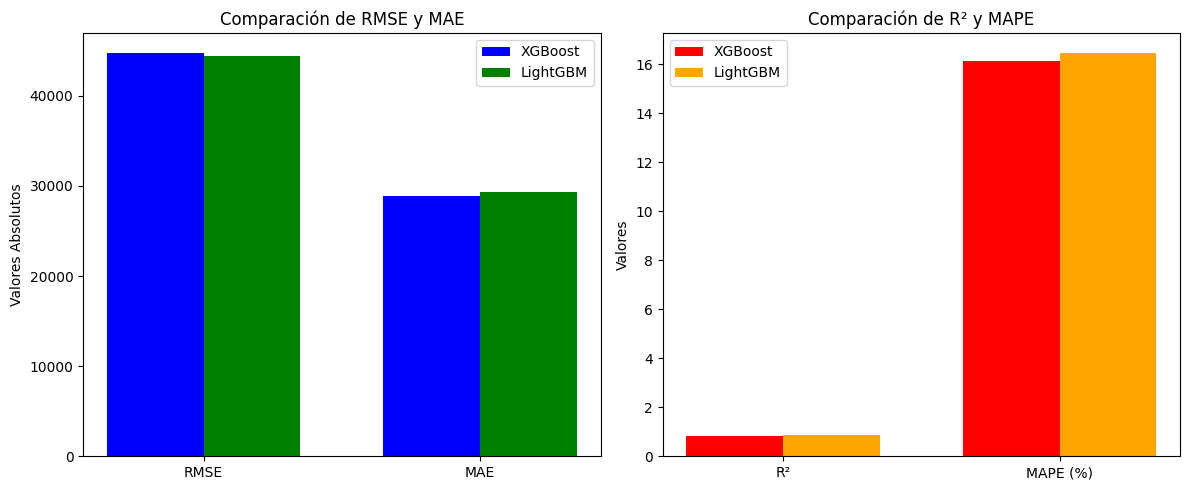

In [ ]:
metrics = ['RMSE', 'MAE']
metrics_r2_mape = ['R²', 'MAPE (%)']

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico para RMSE y MAE
#Tu código aquí

# Gráfico para R² y MAPE
#Tu código aquí

# Ajustar el layout
plt.tight_layout()
plt.show()